# Linear Regression using PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10,1))
X_train

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [3]:
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')
y_train

array([1. , 1.3, 3.1, 2. , 5. , 6.3, 6.6, 7.4, 8. , 9. ], dtype=float32)

In [21]:
fig= px.scatter(X_train, y_train)
fig.update_traces(marker_size=10)
fig.update_layout(
    title="Simulated Regression Data",
    xaxis_title="x",
    yaxis_title="y",
)
fig.show()

In [5]:
# Normalize x and convert to tensor
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train_tensor = torch.from_numpy(y_train).float()


X_train_norm, y_train_tensor

(tensor([[-1.5667],
         [-1.2185],
         [-0.8704],
         [-0.5222],
         [-0.1741],
         [ 0.1741],
         [ 0.5222],
         [ 0.8704],
         [ 1.2185],
         [ 1.5667]]),
 tensor([1.0000, 1.3000, 3.1000, 2.0000, 5.0000, 6.3000, 6.6000, 7.4000, 8.0000,
         9.0000]))

In [6]:
# Create dataset
train_ds = TensorDataset(X_train_norm, y_train_tensor)
batch_size = 1
train_d1 = DataLoader(train_ds, batch_size, shuffle=True)

In [7]:
loss_fn = nn.MSELoss(reduction = 'mean')
input_size = 1
output_size = 1
learning_rate = 0.001
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        
        # Generate predictions
        pred = model(x_batch)[:,0]
        
        # Calc loss
        loss = loss_fn(pred, y_batch)
        
        # Compute Gradients
        loss.backward()
        
        # Update params
        optimizer.step()
        
        # Reset gradients
        optimizer.zero_grad()
        
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')       

Epoch 0 Loss 47.9115
Epoch 10 Loss 10.2679
Epoch 20 Loss 24.2094
Epoch 30 Loss 0.8952
Epoch 40 Loss 11.2103
Epoch 50 Loss 0.6736
Epoch 60 Loss 5.9970
Epoch 70 Loss 1.7017
Epoch 80 Loss 2.6298
Epoch 90 Loss 1.9507
Epoch 100 Loss 0.2250
Epoch 110 Loss 1.1448
Epoch 120 Loss 0.7174
Epoch 130 Loss 0.5372
Epoch 140 Loss 0.4738
Epoch 150 Loss 0.0734
Epoch 160 Loss 0.3870
Epoch 170 Loss 0.0863
Epoch 180 Loss 0.0833
Epoch 190 Loss 0.9901


In [9]:
model.weight.item()

2.6582159996032715

In [10]:
model.bias.item()

4.86647367477417

In [18]:
# Setting up the model to plot
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)

y_pred = model(X_test_norm).detach().numpy()
X_test, X_test_norm, y_pred

(array([[0.        ],
        [0.09090909],
        [0.18181819],
        [0.27272728],
        [0.36363637],
        [0.45454547],
        [0.54545456],
        [0.6363636 ],
        [0.72727275],
        [0.8181818 ],
        [0.90909094],
        [1.        ],
        [1.0909091 ],
        [1.1818181 ],
        [1.2727273 ],
        [1.3636364 ],
        [1.4545455 ],
        [1.5454545 ],
        [1.6363636 ],
        [1.7272727 ],
        [1.8181819 ],
        [1.9090909 ],
        [2.        ],
        [2.090909  ],
        [2.1818182 ],
        [2.2727273 ],
        [2.3636363 ],
        [2.4545455 ],
        [2.5454545 ],
        [2.6363637 ],
        [2.7272727 ],
        [2.8181818 ],
        [2.909091  ],
        [3.        ],
        [3.090909  ],
        [3.1818182 ],
        [3.2727273 ],
        [3.3636363 ],
        [3.4545455 ],
        [3.5454545 ],
        [3.6363637 ],
        [3.7272727 ],
        [3.8181818 ],
        [3.909091  ],
        [4.        ],
        [4

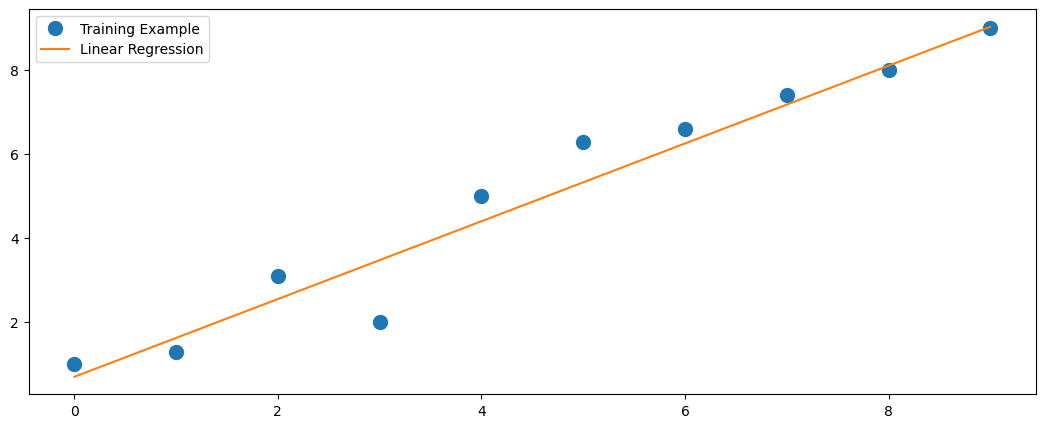

In [31]:
# Plotting results
fig = plt.figure(figsize=(13, 5))
plt.plot(X_train, y_train_tensor, 'o', markersize=10)
plt.plot(X_test, y_pred)
plt.legend(['Training Example', 'Linear Regression'])
plt.show()